In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cell2location
import scvi

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
import seaborn as sns

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Global seed set to 0


In [2]:
path = '/storage/groups/ml01/workspace/anna.schaar/ncem/data/cell2location_hvg/'
ad = sc.read(path + 'cell2location_lymphnode.h5ad')

In [3]:
h_0 = pd.DataFrame(ad.obsm['node_types'], columns=list(ad.uns['node_type_names'].values()))
target_type = pd.DataFrame(np.array(h_0.idxmax(axis=1)), columns=["target_cell"]).reset_index()
ad.obs = target_type

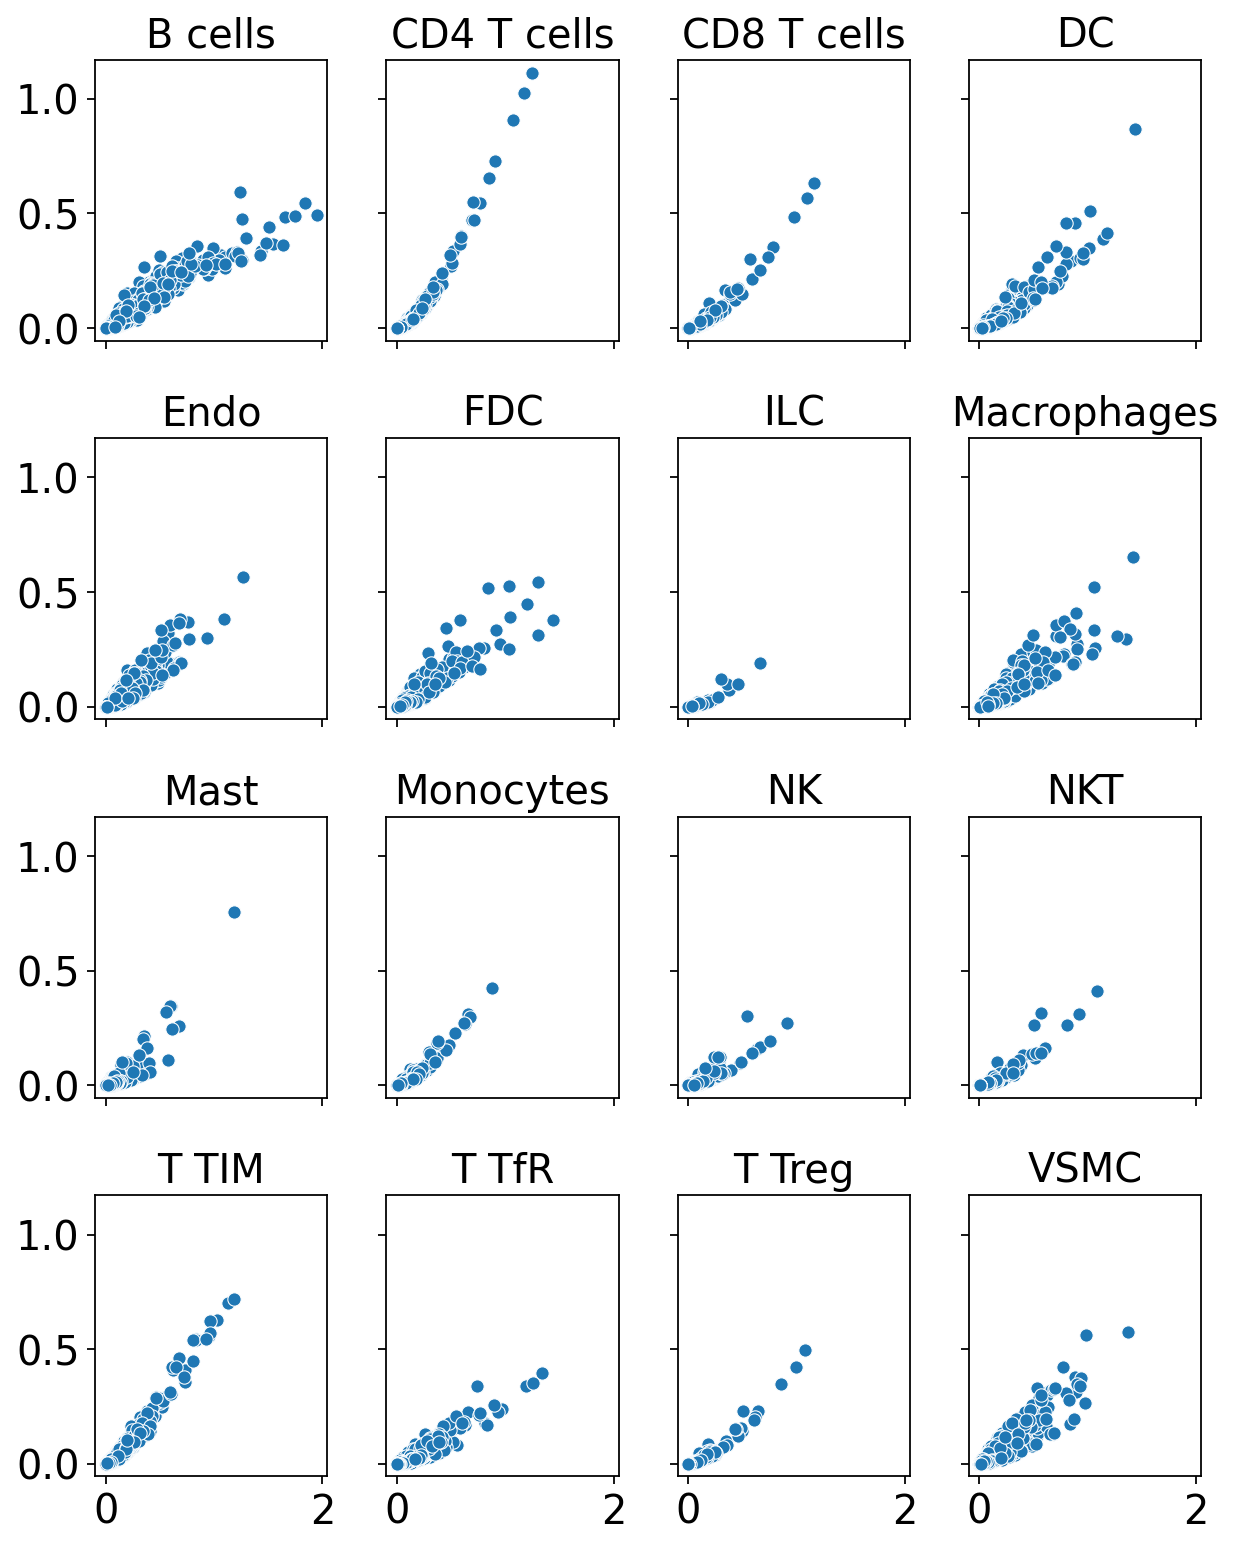

In [13]:
plt.ioff()
ct = list(ad.uns['node_type_names'].values())
sc.set_figure_params(scanpy=True, fontsize=18)
nrows = len(ct) // 4 + int(len(ct) % 4 > 0)
fig, ax = plt.subplots(
    ncols=4, nrows=nrows, figsize=(4 * 2, nrows *2.5), sharex="all", sharey="all"
)
ax = ax.flat
for axis in ax[len(ct) :]:
    axis.remove()
variance_mean = []
for i, ci in enumerate(ct):
    x=np.array(np.log(ad[ad.obs['target_cell']==ci].X.mean(axis=0)+1)).squeeze()
    y=np.array(np.log(ad[ad.obs['target_cell']==ci].X.var(axis=0)+1)).squeeze()
    sns.scatterplot(x=x, y=y, ax=ax[i])
    variance_mean.append(np.array(y/x))
    ax[i].grid(False)
    ax[i].set_title(ci, fontsize=18)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
# Save, show and return figure.
plt.tight_layout()
plt.show()

In [14]:
receiver_type = 'B cells'

ad_subset = ad[ad.obs['target_cell'] == receiver_type]
sc.pp.neighbors(ad_subset, n_neighbors=500, n_pcs=50)
sc.tl.louvain(ad_subset)
sc.tl.umap(ad_subset)

df_list = []
plt.rcParams['axes.grid'] = False
for clust in np.unique(ad_subset.obs['louvain']):
    temp = ad_subset[ad_subset.obs['louvain'] == clust].obsm['proportions']
    temp_df = pd.DataFrame(pd.DataFrame(temp, columns=ct).stack().reset_index()).rename(
        columns={'level_0': 'index', 'level_1': 'source type', 0: 'proportion'})
    temp_df[receiver_type] = clust
    df_list.append(temp_df)
    
data = pd.concat(df_list, axis=0)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'target_cell' as categorical


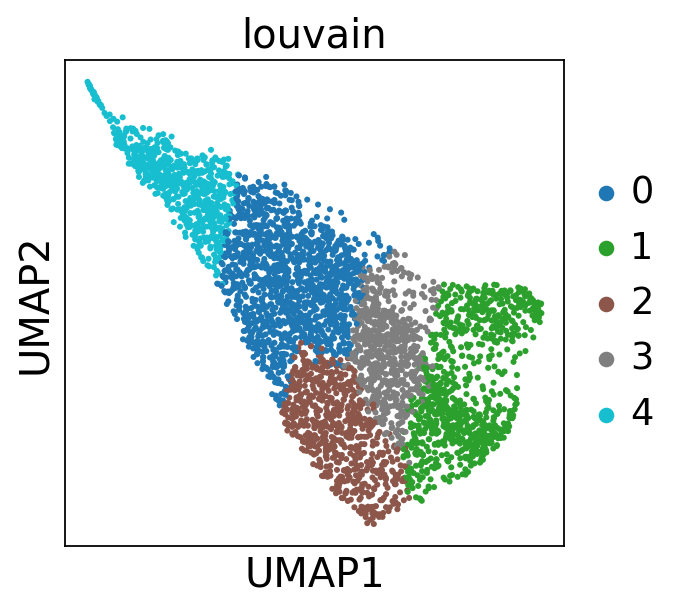

In [15]:
sc.pl.umap(ad_subset, color='louvain', palette=["#1f77b4", "#2ca02c", "#8c564b", "#7f7f7f", "#17becf"])

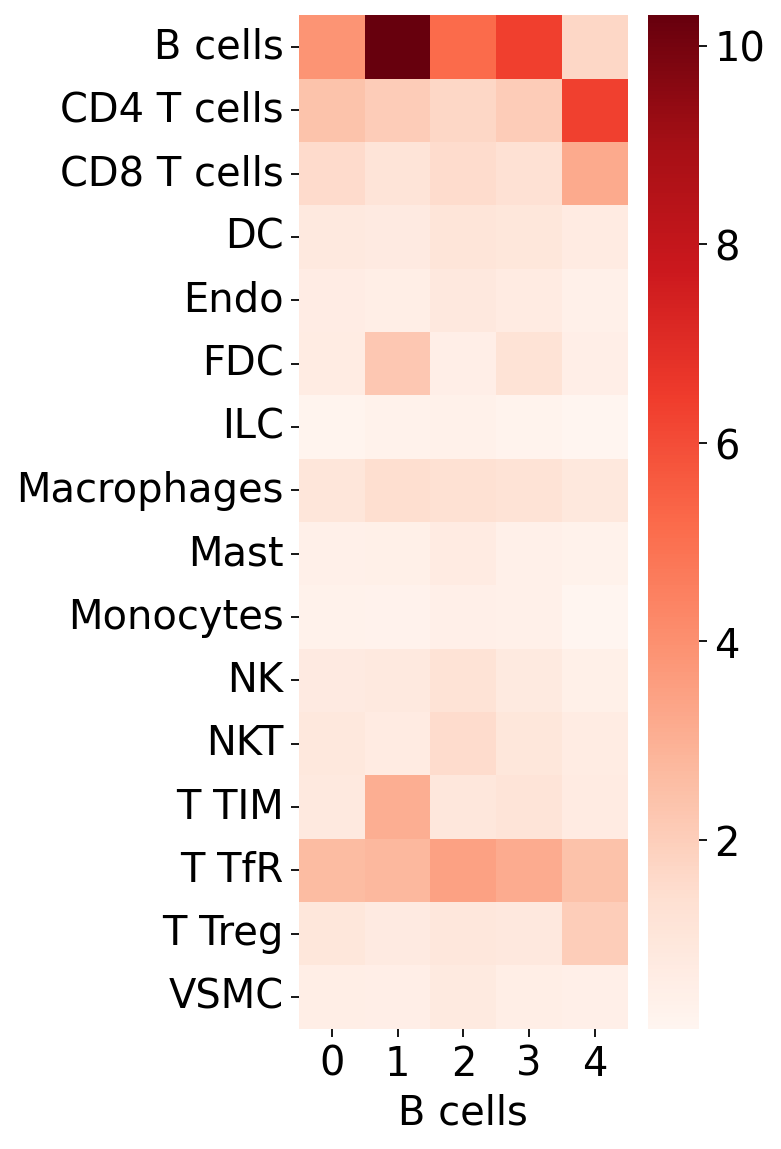

In [16]:
plt.ioff()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7.5))
sns.heatmap(
    data.groupby(['source type', receiver_type]).mean().unstack()['proportion'],
    cmap='Reds', ax=ax
)
plt.xlabel(receiver_type)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [17]:
receiver_type = 'CD4 T cells'

ad_subset = ad[ad.obs['target_cell'] == receiver_type]
sc.pp.neighbors(ad_subset, n_neighbors=500, n_pcs=50)
sc.tl.louvain(ad_subset)
sc.tl.umap(ad_subset)

df_list = []
plt.rcParams['axes.grid'] = False
for clust in np.unique(ad_subset.obs['louvain']):
    temp = ad_subset[ad_subset.obs['louvain'] == clust].obsm['proportions']
    temp_df = pd.DataFrame(pd.DataFrame(temp, columns=ct).stack().reset_index()).rename(
        columns={'level_0': 'index', 'level_1': 'source type', 0: 'proportion'})
    temp_df[receiver_type] = clust
    df_list.append(temp_df)
    
data = pd.concat(df_list, axis=0)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'target_cell' as categorical


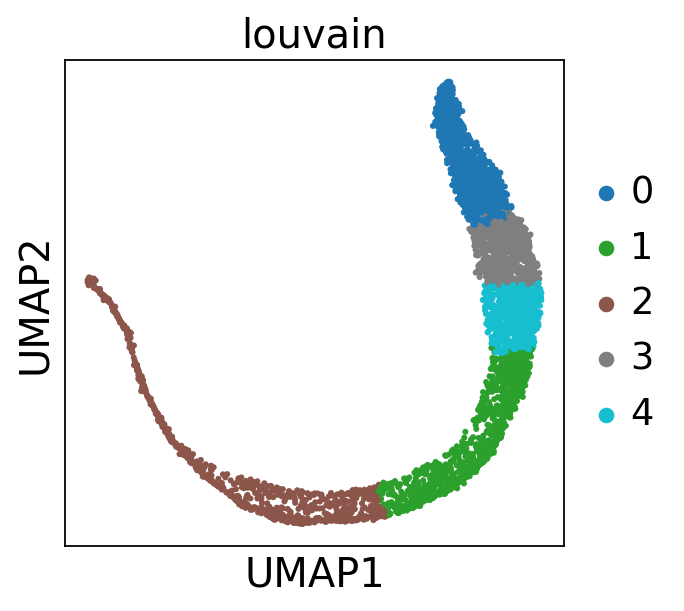

In [18]:
sc.pl.umap(ad_subset, color='louvain', palette=["#1f77b4", "#2ca02c", "#8c564b", "#7f7f7f", "#17becf"])

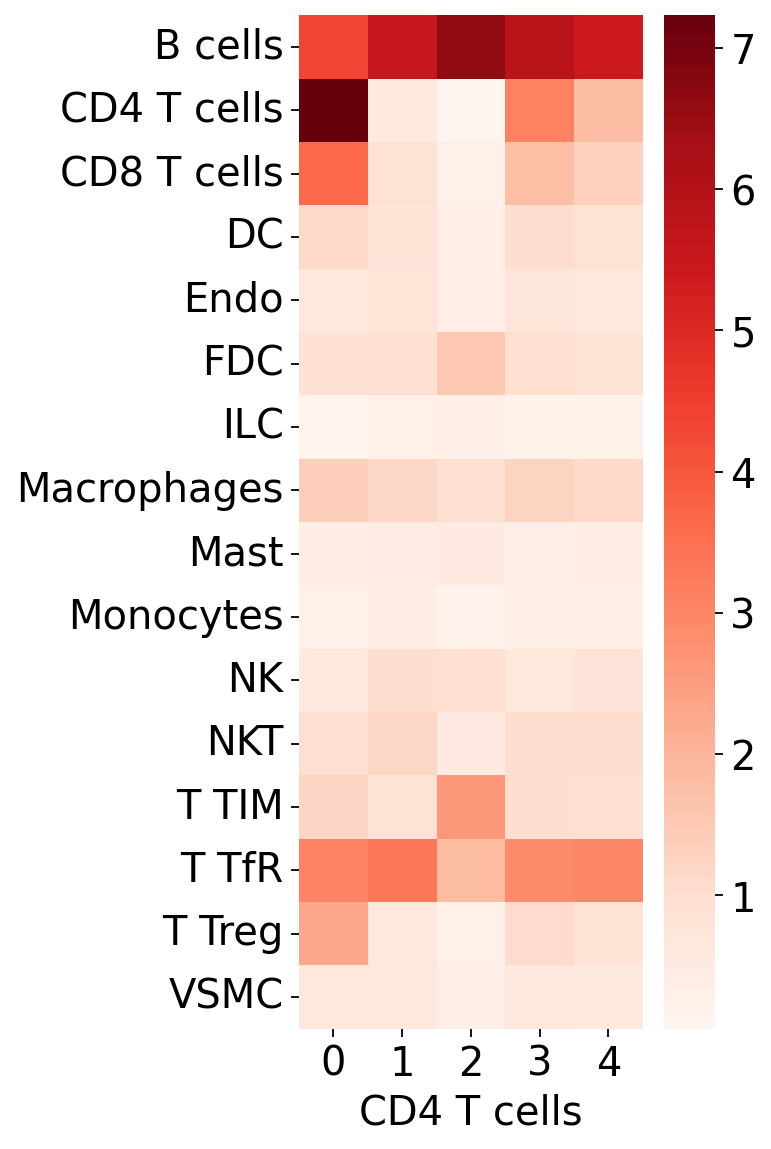

In [19]:
plt.ioff()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7.5))
sns.heatmap(
    data.groupby(['source type', receiver_type]).mean().unstack()['proportion'],
    cmap='Reds', ax=ax
)
plt.xlabel(receiver_type)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [20]:
receiver_type = 'CD8 T cells'

ad_subset = ad[ad.obs['target_cell'] == receiver_type]
sc.pp.neighbors(ad_subset, n_neighbors=500, n_pcs=50)
sc.tl.louvain(ad_subset)
sc.tl.umap(ad_subset)

df_list = []
plt.rcParams['axes.grid'] = False
for clust in np.unique(ad_subset.obs['louvain']):
    temp = ad_subset[ad_subset.obs['louvain'] == clust].obsm['proportions']
    temp_df = pd.DataFrame(pd.DataFrame(temp, columns=ct).stack().reset_index()).rename(
        columns={'level_0': 'index', 'level_1': 'source type', 0: 'proportion'})
    temp_df[receiver_type] = clust
    df_list.append(temp_df)
    
data = pd.concat(df_list, axis=0)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'target_cell' as categorical


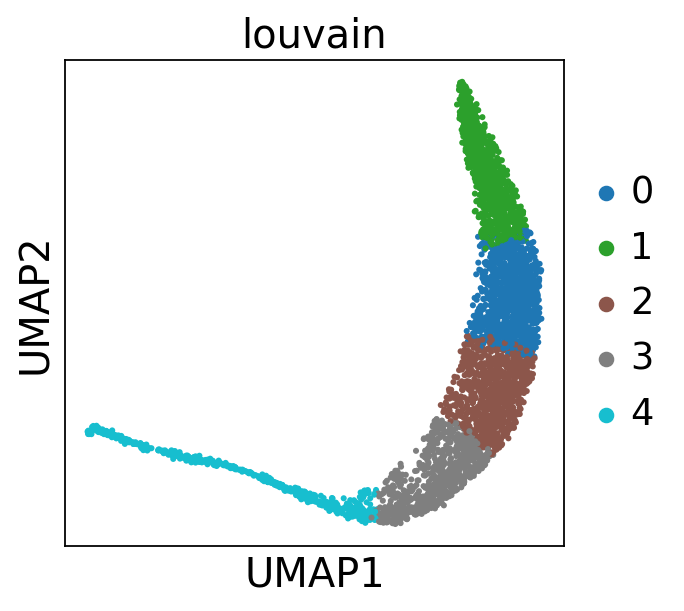

In [21]:
sc.pl.umap(ad_subset, color='louvain', palette=["#1f77b4", "#2ca02c", "#8c564b", "#7f7f7f", "#17becf"])

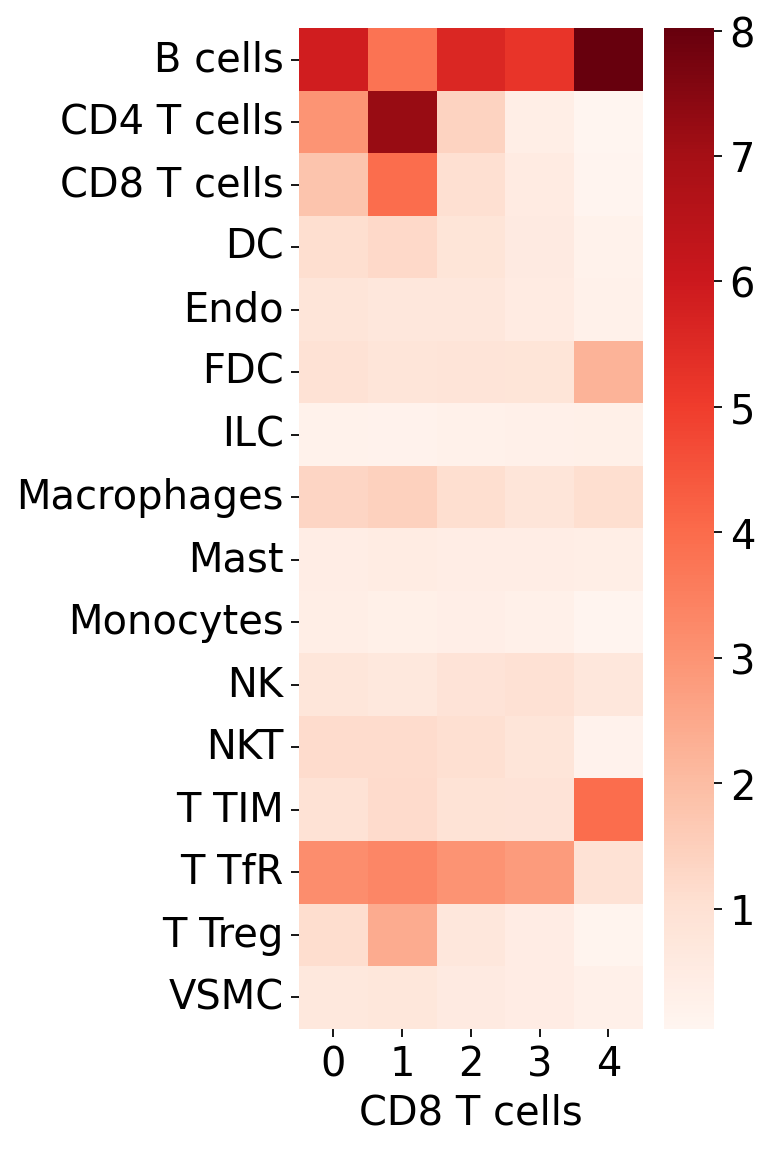

In [26]:
plt.ioff()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7.5))
sns.heatmap(
    data.groupby(['source type', receiver_type]).mean().unstack()['proportion'],
    cmap='Reds', ax=ax
)
plt.xlabel(receiver_type)
plt.ylabel('')
plt.tight_layout()
plt.show()